In [8]:
# Taking input for vertices and edges of a graph
def input_graph():
    # Input number of vertices
    n = int(input("Enter the number of vertices: "))
    print(f"Enter the vertices (space-separated):")
    vertices = input().split()
    
    # Input number of edges
    m = int(input("Enter the number of edges: "))
    edges = []
    print(f"Enter the edges (as pairs of vertices, e.g., 'A B'):")
    
    for _ in range(m):
        u, v = input().split()
        edges.append((u, v))
    
    return vertices, edges

# Example usage
vertices, edges = input_graph()
print("Vertices:", vertices)
print("Edges:", edges)

Enter the vertices (space-separated):
Enter the edges (as pairs of vertices, e.g., 'A B'):
Vertices: ['1', '2', '3', '4', '5', '6', '7']
Edges: [('1', '2'), ('1', '7'), ('2', '3'), ('2', '4'), ('2', '7'), ('3', '4'), ('3', '5'), ('4', '5'), ('4', '6'), ('1', '5'), ('5', '6')]


In [9]:
def transform_graph(vertices, edges):
    # Start adding new vertices after the existing ones
    new_vertices = vertices.copy()
    new_edges = []
    new_vertex_index = len(vertices) + 1  # Start numbering new vertices

    for u, v in edges:
        # Add a new vertex for the edge
        new_vertex = str(new_vertex_index)
        new_vertices.append(new_vertex)
        
        # Connect the new vertex with the original vertices of the edge
        new_edges.append((u, new_vertex))
        new_edges.append((v, new_vertex))
        
        # Increment the new vertex index
        new_vertex_index += 1

    return new_vertices, new_edges

In [10]:
new_vertices, new_edges = transform_graph(vertices, edges)

print("New Vertices:", new_vertices)
print("New Edges:", new_edges)

New Vertices: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
New Edges: [('1', '8'), ('2', '8'), ('1', '9'), ('7', '9'), ('2', '10'), ('3', '10'), ('2', '11'), ('4', '11'), ('2', '12'), ('7', '12'), ('3', '13'), ('4', '13'), ('3', '14'), ('5', '14'), ('4', '15'), ('5', '15'), ('4', '16'), ('6', '16'), ('1', '17'), ('5', '17'), ('5', '18'), ('6', '18')]


In [11]:
import random

def greedy_coloring(n, edges):
    """
    Greedy algorithm for graph coloring considering adjacent and second-degree neighbors.

    Parameters:
        n (int): Number of vertices in the graph (vertices are numbered 1 to n).
        edges (list of tuples): List of edges in the graph as (u, v).

    Returns:
        tuple: A list of colors assigned to each vertex and the total number of colors used.
    """
    # Step 1: Initialize variables
    color = [-1] * (n + 1)  # Color of each vertex (-1 means uncolored)
    color_number = 1        # Number of colors used

    # Step 2: Create adjacency list
    adjacency_list = {i: [] for i in range(1, n + 1)}
    for u, v in edges:
        u, v = int(u), int(v)
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)




    # Step 3 to Step 6: Assign colors to vertices
    for vertex in range(1, n + 1):
        if color[vertex] == -1:  # If the vertex is not colored
            # Gather all colors used by adjacent and second-degree neighbors
            adjacent_colors = set()
            for adj in adjacency_list[vertex]:  # First-degree neighbors
                if color[adj] != -1:
                    adjacent_colors.add(color[adj])
                for second_degree in adjacency_list[adj]:  # Second-degree neighbors
                    if color[second_degree] != -1:
                        adjacent_colors.add(color[second_degree])

            # Assign the minimum color not used by neighbors
            for c in range(1, n + 1):
                if c not in adjacent_colors:
                    color[vertex] = c
                    if c > color_number:
                        color_number = c
                    break

    # Return the coloring and the number of colors used
    return color[1:], color_number

# Example usage
vertices = 18  # Number of vertices
# edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 5), (2, 4)]  # Graph edges

# Convert all edges to consistent types (if needed)
# edges = [(int(u), int(v)) for u, v in edges]

colors, total_colors = greedy_coloring(vertices, new_edges)
print("Colors assigned to vertices:", colors)
print("Total number of colors used:", total_colors)



Colors assigned to vertices: [1, 2, 1, 3, 2, 1, 3, 3, 2, 4, 1, 5, 2, 3, 4, 5, 5, 6]
Total number of colors used: 6


In [13]:
import random

def greedy_coloring_randomized_store_all(n, edges, iterations):
    """
    Greedy graph coloring with vertices traversed in random order, repeated multiple times,
    and storing all the coloring results.

    Parameters:
        n (int): Number of vertices in the graph (vertices are numbered 1 to n).
        edges (list of tuples): List of edges in the graph as (u, v).
        iterations (int): Number of times to repeat the randomized coloring.

    Returns:
        tuple:
            - A list of all colorings and their respective number of colors used.
            - Best coloring found and the minimum number of colors used.
    """
    def color_graph_random_order():
        # Initialize variables
        color = [-1] * (n + 1)  # Color of each vertex (-1 means uncolored)
        color_number = 1        # Number of colors used

        # Shuffle the order of vertices
        vertices = list(range(1, n + 1))
        random.shuffle(vertices)

        # Assign colors to vertices in random order
        for vertex in vertices:
            if color[vertex] == -1:  # If the vertex is not colored
                # Gather all colors used by adjacent and second-degree neighbors
                adjacent_colors = set()
                for adj in adjacency_list[vertex]:  # First-degree neighbors
                    if color[adj] != -1:
                        adjacent_colors.add(color[adj])
                    for second_degree in adjacency_list[adj]:  # Second-degree neighbors
                        if color[second_degree] != -1:
                            adjacent_colors.add(color[second_degree])

                # Assign the minimum color not used by neighbors
                for c in range(1, n + 1):
                    if c not in adjacent_colors:
                        color[vertex] = c
                        if c > color_number:
                            color_number = c
                        break

        return color[1:], color_number

    # Step 1: Create adjacency list
    adjacency_list = {i: [] for i in range(1, n + 1)}
    for u, v in edges:
        u, v = int(u), int(v)
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)

    # Step 2: Repeat the coloring process, store all results, and track the best result
    all_colorings = []  # Store all colorings and the number of colors used
    best_coloring = None
    min_colors_used = float('inf')

    for _ in range(iterations):
        coloring, colors_used = color_graph_random_order()
        all_colorings.append((coloring, colors_used))  # Store the result

        if colors_used < min_colors_used:
            best_coloring = coloring
            min_colors_used = colors_used

    return all_colorings, (best_coloring, min_colors_used)


# Example usage
vertices = 18  # Number of vertices
# edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 5), (2, 4)]  # Graph edges
iterations = 100  # Number of randomizations

all_colorings, (best_colors, total_colors) = greedy_coloring_randomized_store_all(vertices, new_edges, iterations)

# Print all colorings
print("All colorings and number of colors used:")
for idx, (coloring, colors_used) in enumerate(all_colorings, start=1):
    print(f"Iteration {idx}: Coloring = {coloring}, Colors used = {colors_used}")

# Print the best result
print("\nBest coloring found:", best_colors)
print("Minimum number of colors used:", total_colors)


All colorings and number of colors used:
Iteration 1: Coloring = [1, 2, 1, 3, 6, 2, 3, 3, 2, 4, 6, 1, 7, 2, 5, 4, 4, 1], Colors used = 7
Iteration 2: Coloring = [2, 1, 2, 6, 4, 3, 3, 4, 1, 3, 5, 2, 4, 1, 3, 1, 5, 2], Colors used = 6
Iteration 3: Coloring = [5, 3, 2, 1, 4, 3, 1, 4, 3, 1, 6, 2, 4, 3, 5, 2, 2, 1], Colors used = 6
Iteration 4: Coloring = [4, 1, 4, 2, 3, 1, 2, 2, 1, 3, 5, 4, 1, 6, 4, 3, 5, 2], Colors used = 6
Iteration 5: Coloring = [1, 2, 1, 6, 2, 3, 3, 3, 2, 6, 1, 4, 5, 3, 4, 2, 5, 1], Colors used = 6
Iteration 6: Coloring = [2, 5, 6, 4, 3, 1, 3, 3, 1, 1, 6, 2, 2, 5, 1, 3, 4, 2], Colors used = 6
Iteration 7: Coloring = [2, 4, 3, 1, 5, 2, 1, 1, 3, 5, 3, 2, 2, 1, 4, 5, 6, 3], Colors used = 6
Iteration 8: Coloring = [4, 3, 1, 4, 2, 1, 1, 1, 2, 2, 5, 4, 3, 4, 1, 2, 5, 3], Colors used = 5
Iteration 9: Coloring = [4, 2, 1, 3, 5, 2, 1, 3, 5, 5, 1, 4, 2, 3, 6, 4, 2, 1], Colors used = 6
Iteration 10: Coloring = [4, 1, 2, 6, 3, 1, 2, 2, 1, 4, 7, 3, 3, 1, 4, 5, 5, 2], Colors used = 

In [1]:
import random
from itertools import combinations

def lox_crossover(parent1, parent2):
    """
    Perform LOX (Linear Order Crossover) between two parents.
    """
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))  # Select a random range
    child = [-1] * n

    # Copy the range from parent1 to the child
    child[start:end+1] = parent1[start:end+1]

    # Fill remaining genes from parent2, preserving the order
    pos = end + 1
    for gene in parent2:
        if gene not in child:
            if pos >= n:
                pos = 0
            child[pos] = gene
            pos += 1

    return child

def fitness(coloring):
    """
    Fitness is inversely proportional to the number of colors used.
    """
    num_colors = len(set(coloring))
    return 1 / num_colors  # Higher fitness for fewer colors

def random_coloring(n, max_colors):
    """
    Generate a random coloring for a graph with `n` vertices.
    """
    return [random.randint(1, max_colors) for _ in range(n)]

def greedy_genetic_algorithm(n, edges, population_size=100, generations=50, mutation_rate=0.1):
    """
    Solve the graph coloring problem using a Genetic Algorithm.

    Parameters:
        n (int): Number of vertices.
        edges (list of tuples): List of edges in the graph.
        population_size (int): Number of individuals in the population.
        generations (int): Number of generations to evolve.
        mutation_rate (float): Probability of mutation.

    Returns:
        list: The best coloring found.
    """
    # Step 1: Create adjacency list
    adjacency_list = {i: [] for i in range(1, n + 1)}
    for u, v in edges:
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)

    # Step 2: Initialize random population
    max_colors = n  # Initially, allow each vertex to have a unique color
    population = [random_coloring(n, max_colors) for _ in range(population_size)]

    for generation in range(generations):
        # Step 3: Calculate fitness for the population
        fitness_scores = [fitness(coloring) for coloring in population]

        # Step 4: Select parents using roulette wheel selection
        total_fitness = sum(fitness_scores)
        selection_probs = [score / total_fitness for score in fitness_scores]
        selected_parents = random.choices(population, weights=selection_probs, k=population_size // 2)

        # Step 5: Perform crossover to generate offspring
        offspring = []
        for parent1, parent2 in combinations(selected_parents, 2):
            child1 = lox_crossover(parent1, parent2)
            child2 = lox_crossover(parent2, parent1)
            offspring.extend([child1, child2])
            if len(offspring) >= population_size:
                break

        # Step 6: Apply mutation
        for child in offspring:
            if random.random() < mutation_rate:
                mutate_index = random.randint(0, n - 1)
                child[mutate_index] = random.randint(1, max_colors)

        # Step 7: Replace the old population with the new one
        population = offspring

        # Optional: Keep the best individual in the population
        best_coloring = min(population, key=lambda c: len(set(c)))
        print(f"Generation {generation + 1}: Best fitness = {fitness(best_coloring):.4f}, Colors used = {len(set(best_coloring))}")

    # Return the best solution
    return best_coloring



# Example usage
vertices = 6  # Number of vertices
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (1, 6), (2, 5)]  # Graph edges
best_coloring = greedy_genetic_algorithm(vertices, edges, population_size=100, generations=50, mutation_rate=0.1)

print("Best coloring found:", best_coloring)
print("Minimum number of colors used:", len(set(best_coloring)))


Generation 1: Best fitness = 0.2500, Colors used = 4
Generation 2: Best fitness = 0.2500, Colors used = 4
Generation 3: Best fitness = 0.2500, Colors used = 4
Generation 4: Best fitness = 0.2000, Colors used = 5
Generation 5: Best fitness = 0.2000, Colors used = 5
Generation 6: Best fitness = 0.2500, Colors used = 4
Generation 7: Best fitness = 0.2000, Colors used = 5
Generation 8: Best fitness = 0.2000, Colors used = 5
Generation 9: Best fitness = 0.2000, Colors used = 5
Generation 10: Best fitness = 0.2000, Colors used = 5
Generation 11: Best fitness = 0.2000, Colors used = 5
Generation 12: Best fitness = 0.2000, Colors used = 5
Generation 13: Best fitness = 0.2000, Colors used = 5
Generation 14: Best fitness = 0.2000, Colors used = 5
Generation 15: Best fitness = 0.2000, Colors used = 5
Generation 16: Best fitness = 0.2000, Colors used = 5
Generation 17: Best fitness = 0.2000, Colors used = 5
Generation 18: Best fitness = 0.2000, Colors used = 5
Generation 19: Best fitness = 0.2000,

In [8]:
import random
from itertools import combinations


def transform_graph(n, edges):
    """
    Transform the graph by adding a new vertex between each edge.

    Parameters:
        n (int): Number of vertices in the original graph.
        edges (list of tuples): List of edges in the original graph.

    Returns:
        tuple:
            - int: Number of vertices in the transformed graph.
            - list of tuples: List of edges in the transformed graph.
    """
    new_edges = []
    current_vertex = n + 1  # Start adding new vertices after the original vertices
    for u, v in edges:
        # Add a new vertex w between u and v
        w = current_vertex
        current_vertex += 1
        new_edges.append((u, w))
        new_edges.append((v, w))
    return current_vertex - 1, new_edges


def greedy_coloring_randomized(n, edges, iterations=100):
    """
    Greedy graph coloring with vertices traversed in random order, repeated multiple times.

    Parameters:
        n (int): Number of vertices in the graph.
        edges (list of tuples): List of edges in the graph.
        iterations (int): Number of randomizations.

    Returns:
        list: A list of colorings generated by the greedy algorithm.
    """
    def color_graph_random_order():
        # Initialize variables
        color = [-1] * (n + 1)  # Color of each vertex (-1 means uncolored)
        color_number = 1        # Number of colors used

        # Shuffle the order of vertices
        vertices = list(range(1, n + 1))
        random.shuffle(vertices)

        # Assign colors to vertices in random order
        for vertex in vertices:
            if color[vertex] == -1:  # If the vertex is not colored
                # Gather all colors used by adjacent and second-degree neighbors
                adjacent_colors = set()
                for adj in adjacency_list[vertex]:  # First-degree neighbors
                    if color[adj] != -1:
                        adjacent_colors.add(color[adj])
                    for second_degree in adjacency_list[adj]:  # Second-degree neighbors
                        if color[second_degree] != -1:
                            adjacent_colors.add(color[second_degree])

                # Assign the minimum color not used by neighbors
                for c in range(1, n + 1):
                    if c not in adjacent_colors:
                        color[vertex] = c
                        if c > color_number:
                            color_number = c
                        break

        return color[1:], color_number

    # Step 1: Create adjacency list
    adjacency_list = {i: [] for i in range(1, n + 1)}
    for u, v in edges:
        u, v = int(u), int(v)
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)

    # Step 2: Repeat the coloring process and track the best result
    colorings = []
    for _ in range(iterations):
        coloring, _ = color_graph_random_order()
        colorings.append(coloring)

    return colorings


def lox_crossover(parent1, parent2):
    """
    Perform LOX crossover on two parents.
    """
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))  # Select a random range
    child = [-1] * n

    child[start:end + 1] = parent1[start:end + 1]

    pos = end + 1
    for gene in parent2:
        if gene not in child:
            if pos >= n:
                pos = 0
            child[pos] = gene
            pos += 1

    return child


def fitness(coloring):
    """
    Fitness function based on the number of colors used.
    """
    num_colors = len(set(coloring))
    return 1 / num_colors


def genetic_algorithm_on_transformed_graph(n, edges, population_size=100, generations=200, mutation_rate=0.1):
    """
    Solve the graph coloring problem on the transformed graph using a Genetic Algorithm.

    Parameters:
        n (int): Number of vertices in the original graph.
        edges (list of tuples): List of edges in the original graph.
        population_size (int): Number of individuals in the population.
        generations (int): Number of generations to evolve.
        mutation_rate (float): Probability of mutation.

    Returns:
        list: The best coloring found for the transformed graph.
    """
    # Step 1: Transform the graph
    transformed_n, transformed_edges = transform_graph(n, edges)

    # Step 2: Generate initial population using greedy coloring
    initial_population = greedy_coloring_randomized(transformed_n, transformed_edges, iterations=population_size)

    population = initial_population

    # Initialize the best solution globally
    global_best_coloring = None
    global_min_colors = float('inf')

    for generation in range(generations):
        # Step 3: Calculate fitness for the population
        fitness_scores = [fitness(coloring) for coloring in population]

        # Step 4: Select parents using roulette wheel selection
        total_fitness = sum(fitness_scores)
        selection_probs = [score / total_fitness for score in fitness_scores]
        selected_parents = random.choices(population, weights=selection_probs, k=population_size // 2)

        # Step 5: Perform crossover to generate offspring
        offspring = []
        for parent1, parent2 in combinations(selected_parents, 2):
            child1 = lox_crossover(parent1, parent2)
            child2 = lox_crossover(parent2, parent1)
            offspring.extend([child1, child2])
            if len(offspring) >= population_size:
                break

        # Step 6: Apply mutation
        for child in offspring:
            if random.random() < mutation_rate:
                mutate_index = random.randint(0, transformed_n - 1)
                child[mutate_index] = random.randint(1, transformed_n)

        # Step 7: Replace the old population with the new one
        population = offspring

    #     # Optional: Keep the best individual in the population
    #     best_coloring = min(population, key=lambda c: len(set(c)))
    #     print(f"Generation {generation + 1}: Best fitness = {fitness(best_coloring):.4f}, Colors used = {len(set(best_coloring))}")

    # # Return the best solution
    # return best_coloring, len(set(best_coloring))



        # Track the best individual in this generation
        generation_best_coloring = min(population, key=lambda c: len(set(c)))
        generation_min_colors = len(set(generation_best_coloring))

        # Update global best if this generation's best is better
        if generation_min_colors < global_min_colors:
            global_best_coloring = generation_best_coloring
            global_min_colors = generation_min_colors

        print(f"Generation {generation + 1}: Best fitness = {fitness(generation_best_coloring):.4f}, "
              f"Colors used = {generation_min_colors}")

    # Return the best solution found across all generations
    return global_best_coloring, global_min_colors


# Example usage
original_vertices = 4  # Number of vertices in the original graph
original_edges = [(1, 2), (2, 3), (3, 4), (1, 4)]  # Edges in the original graph

best_coloring, min_colors = genetic_algorithm_on_transformed_graph(original_vertices, original_edges)

print("\nBest coloring found:", best_coloring)
print("Minimum number of colors used:", min_colors)


Generation 1: Best fitness = 0.2000, Colors used = 5
Generation 2: Best fitness = 0.2000, Colors used = 5
Generation 3: Best fitness = 0.2000, Colors used = 5
Generation 4: Best fitness = 0.2000, Colors used = 5
Generation 5: Best fitness = 0.2000, Colors used = 5
Generation 6: Best fitness = 0.2000, Colors used = 5
Generation 7: Best fitness = 0.2000, Colors used = 5
Generation 8: Best fitness = 0.2000, Colors used = 5
Generation 9: Best fitness = 0.2000, Colors used = 5
Generation 10: Best fitness = 0.2000, Colors used = 5
Generation 11: Best fitness = 0.2000, Colors used = 5
Generation 12: Best fitness = 0.2000, Colors used = 5
Generation 13: Best fitness = 0.2000, Colors used = 5
Generation 14: Best fitness = 0.2000, Colors used = 5
Generation 15: Best fitness = 0.2000, Colors used = 5
Generation 16: Best fitness = 0.2000, Colors used = 5
Generation 17: Best fitness = 0.2000, Colors used = 5
Generation 18: Best fitness = 0.2000, Colors used = 5
Generation 19: Best fitness = 0.2000,

In [1]:
import random
from itertools import combinations


def transform_graph(n, edges):
    """
    Transform the graph by adding a new vertex between each edge.
    """
    new_edges = []
    current_vertex = n + 1
    for u, v in edges:
        # Add a new vertex w between u and v
        w = current_vertex
        current_vertex += 1
        new_edges.append((u, w))
        new_edges.append((v, w))
    return current_vertex - 1, new_edges


def greedy_coloring_randomized(n, edges, iterations=100):
    """
    Greedy graph coloring with vertices traversed in random order, repeated multiple times.
    """
    def color_graph_random_order():
        color = [-1] * (n + 1)  # Colors for vertices
        vertices = list(range(1, n + 1))
        random.shuffle(vertices)

        for vertex in vertices:
            # Find used colors among adjacent and second-degree adjacent vertices
            adjacent_colors = set()
            for neighbor in adjacency_list[vertex]:  # First-degree neighbors
                if color[neighbor] != -1:
                    adjacent_colors.add(color[neighbor])
                # Check second-degree neighbors
                for second_neighbor in adjacency_list[neighbor]:
                    if color[second_neighbor] != -1:
                        adjacent_colors.add(color[second_neighbor])

            # Assign the smallest available color
            for c in range(1, n + 1):
                if c not in adjacent_colors:
                    color[vertex] = c
                    break

        return color[1:]


    # Create adjacency list
    adjacency_list = {i: [] for i in range(1, n + 1)}
    for u, v in edges:
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)

    # Generate colorings
    colorings = [color_graph_random_order() for _ in range(iterations)]
    return colorings


def lox_crossover(parent1, parent2):
    """
    Perform LOX crossover on two parents.
    """
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    child = [-1] * n
    child[start:end + 1] = parent1[start:end + 1]

    pos = end + 1
    for gene in parent2:
        if gene not in child:
            if pos >= n:
                pos = 0
            child[pos] = gene
            pos += 1

    return child


def fitness(coloring, edges):
    """
    Fitness function to evaluate the coloring.
    """
    # Check for validity: no two adjacent vertices have the same color
    for u, v in edges:
        if coloring[u - 1] == coloring[v - 1]:
            return float('-inf')  # Invalid coloring
    # Return the inverse of the number of colors (lower is better)
    return 1 / len(set(coloring))


def genetic_algorithm_on_transformed_graph(n, edges, population_size=100, generations=200, mutation_rate=0.1):
    """
    Solve the graph coloring problem on the transformed graph using a Genetic Algorithm.
    """
    # Transform the graph
    transformed_n, transformed_edges = transform_graph(n, edges)

    # Generate initial population
    initial_population = greedy_coloring_randomized(transformed_n, transformed_edges, iterations=population_size)
    population = initial_population

    # Track the global best
    global_best_coloring = None
    global_min_colors = float('inf')

    for generation in range(generations):
        # Calculate fitness for each individual
        fitness_scores = [fitness(coloring, transformed_edges) for coloring in population]

        # Select valid individuals
        valid_population = [(coloring, score) for coloring, score in zip(population, fitness_scores) if score > float('-inf')]
        if not valid_population:
            raise ValueError("No valid solutions in the population!")

        # Sort by fitness (higher is better)
        valid_population.sort(key=lambda x: x[1], reverse=True)

        # Update the best coloring
        best_coloring, best_fitness = valid_population[0]
        min_colors = len(set(best_coloring))

        if min_colors < global_min_colors:
            global_best_coloring = best_coloring
            global_min_colors = min_colors

        # Selection: Keep top individuals
        selected_parents = [coloring for coloring, _ in valid_population[:population_size // 2]]

        # Crossover
        offspring = []
        for parent1, parent2 in combinations(selected_parents, 2):
            offspring.append(lox_crossover(parent1, parent2))
            offspring.append(lox_crossover(parent2, parent1))
            if len(offspring) >= population_size:
                break

        # Mutation
        for child in offspring:
            if random.random() < mutation_rate:
                mutate_index = random.randint(0, transformed_n - 1)
                # Reassign a random color
                child[mutate_index] = random.randint(1, transformed_n)

        # Replace population
        population = offspring

        # Print progress
        print(f"Generation {generation + 1}: Best fitness = {best_fitness:.4f}, Colors used = {min_colors}")

    # Return the global best solution
    return global_best_coloring, global_min_colors


# Example usage
original_vertices = 4
original_edges = [(1, 2), (2, 3), (3, 4), (1, 4)]

best_coloring, min_colors = genetic_algorithm_on_transformed_graph(original_vertices, original_edges)

print("\nBest coloring found:", best_coloring)
print("Minimum number of colors used:", min_colors)


Generation 1: Best fitness = 0.2500, Colors used = 4
Generation 2: Best fitness = 0.2500, Colors used = 4
Generation 3: Best fitness = 0.2000, Colors used = 5
Generation 4: Best fitness = 0.2000, Colors used = 5
Generation 5: Best fitness = 0.2500, Colors used = 4
Generation 6: Best fitness = 0.2500, Colors used = 4
Generation 7: Best fitness = 0.3333, Colors used = 3
Generation 8: Best fitness = 0.2500, Colors used = 4
Generation 9: Best fitness = 0.2500, Colors used = 4
Generation 10: Best fitness = 0.2500, Colors used = 4
Generation 11: Best fitness = 0.2500, Colors used = 4
Generation 12: Best fitness = 0.2500, Colors used = 4
Generation 13: Best fitness = 0.2500, Colors used = 4
Generation 14: Best fitness = 0.3333, Colors used = 3
Generation 15: Best fitness = 0.2500, Colors used = 4
Generation 16: Best fitness = 0.2500, Colors used = 4
Generation 17: Best fitness = 0.2500, Colors used = 4
Generation 18: Best fitness = 0.2500, Colors used = 4
Generation 19: Best fitness = 0.2500,

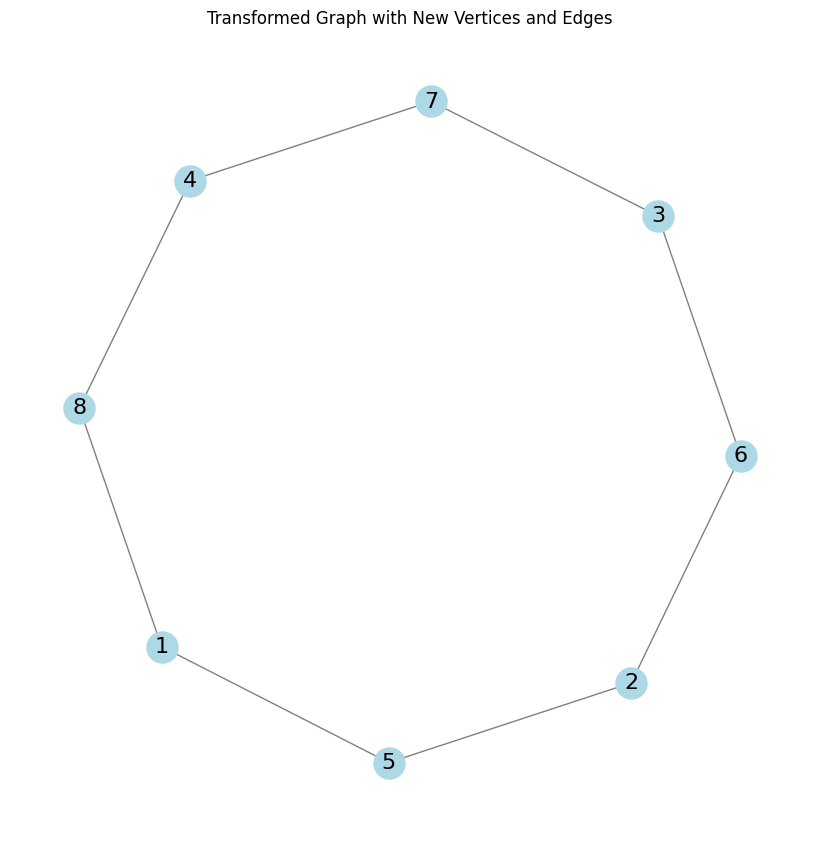

Generation 1: Best fitness = 0.2500, Colors used = 4
Generation 2: Best fitness = 0.2500, Colors used = 4
Generation 3: Best fitness = 0.2500, Colors used = 4
Generation 4: Best fitness = 0.2000, Colors used = 5
Generation 5: Best fitness = 0.2000, Colors used = 5
Generation 6: Best fitness = 0.2500, Colors used = 4
Generation 7: Best fitness = 0.2500, Colors used = 4
Generation 8: Best fitness = 0.2000, Colors used = 5
Generation 9: Best fitness = 0.2500, Colors used = 4
Generation 10: Best fitness = 0.3333, Colors used = 3
Generation 11: Best fitness = 0.2500, Colors used = 4
Generation 12: Best fitness = 0.2500, Colors used = 4
Generation 13: Best fitness = 0.3333, Colors used = 3
Generation 14: Best fitness = 0.2500, Colors used = 4
Generation 15: Best fitness = 0.2500, Colors used = 4
Generation 16: Best fitness = 0.2500, Colors used = 4
Generation 17: Best fitness = 0.2500, Colors used = 4
Generation 18: Best fitness = 0.2500, Colors used = 4
Generation 19: Best fitness = 0.2500,

In [3]:
import random
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx


def transform_graph(n, edges):
    """
    Transform the graph by adding a new vertex between each edge.
    """
    new_edges = []
    current_vertex = n + 1  # New vertices start after the original ones
    for u, v in edges:
        w = current_vertex
        current_vertex += 1
        new_edges.append((u, w))
        new_edges.append((v, w))
    return current_vertex - 1, new_edges


def greedy_coloring_randomized(n, edges, iterations=100):
    """
    Greedy graph coloring with vertices traversed in random order, repeated multiple times.
    """
    def color_graph_random_order():
        color = [-1] * (n + 1)  # Colors for vertices
        vertices = list(range(1, n + 1))
        random.shuffle(vertices)

        for vertex in vertices:
            # Find used colors among adjacent and second-degree adjacent vertices
            adjacent_colors = set()
            for neighbor in adjacency_list[vertex]:  # First-degree neighbors
                if color[neighbor] != -1:
                    adjacent_colors.add(color[neighbor])
                # Check second-degree neighbors
                for second_neighbor in adjacency_list[neighbor]:
                    if color[second_neighbor] != -1:
                        adjacent_colors.add(color[second_neighbor])

            # Assign the smallest available color
            for c in range(1, n + 1):
                if c not in adjacent_colors:
                    color[vertex] = c
                    break

        return color[1:]

    # Create adjacency list
    adjacency_list = {i: [] for i in range(1, n + 1)}
    for u, v in edges:
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)

    # Generate colorings
    colorings = [color_graph_random_order() for _ in range(iterations)]
    return colorings


def lox_crossover(parent1, parent2):
    """
    Perform LOX crossover on two parents.
    """
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    child = [-1] * n
    child[start:end + 1] = parent1[start:end + 1]

    pos = end + 1
    for gene in parent2:
        if gene not in child:
            if pos >= n:
                pos = 0
            child[pos] = gene
            pos += 1

    return child


def fitness(coloring, edges):
    """
    Fitness function to evaluate the coloring.
    """
    # Check for validity: no two adjacent vertices have the same color
    for u, v in edges:
        if coloring[u - 1] == coloring[v - 1]:
            return float('-inf')  # Invalid coloring
    # Return the inverse of the number of colors (lower is better)
    return 1 / len(set(coloring))


def genetic_algorithm_on_transformed_graph(n, edges, population_size=100, generations=200, mutation_rate=0.1):
    """
    Solve the graph coloring problem on the transformed graph using a Genetic Algorithm.
    """
    # Transform the graph
    transformed_n, transformed_edges = transform_graph(n, edges)

    # Generate initial population
    initial_population = greedy_coloring_randomized(transformed_n, transformed_edges, iterations=population_size)
    population = initial_population

    # Track the global best
    global_best_coloring = None
    global_min_colors = float('inf')

    for generation in range(generations):
        # Calculate fitness for each individual
        fitness_scores = [fitness(coloring, transformed_edges) for coloring in population]

        # Select valid individuals
        valid_population = [(coloring, score) for coloring, score in zip(population, fitness_scores) if score > float('-inf')]
        if not valid_population:
            raise ValueError("No valid solutions in the population!")

        # Sort by fitness (higher is better)
        valid_population.sort(key=lambda x: x[1], reverse=True)

        # Update the best coloring
        best_coloring, best_fitness = valid_population[0]
        min_colors = len(set(best_coloring))

        if min_colors < global_min_colors:
            global_best_coloring = best_coloring
            global_min_colors = min_colors

        # Selection: Keep top individuals
        selected_parents = [coloring for coloring, _ in valid_population[:population_size // 2]]

        # Crossover
        offspring = []
        for parent1, parent2 in combinations(selected_parents, 2):
            offspring.append(lox_crossover(parent1, parent2))
            offspring.append(lox_crossover(parent2, parent1))
            if len(offspring) >= population_size:
                break

        # Mutation
        for child in offspring:
            if random.random() < mutation_rate:
                mutate_index = random.randint(0, transformed_n - 1)
                # Reassign a random color
                child[mutate_index] = random.randint(1, transformed_n)

        # Replace population
        population = offspring

        # Print progress
        print(f"Generation {generation + 1}: Best fitness = {best_fitness:.4f}, Colors used = {min_colors}")

    # Return the global best solution
    return global_best_coloring, global_min_colors


# Function to visualize the transformed graph
def visualize_transformed_graph(n, edges):
    transformed_n, transformed_edges = transform_graph(n, edges)
    G = nx.Graph()
    G.add_nodes_from(range(1, transformed_n + 1))
    G.add_edges_from(transformed_edges)

    # Create a layout for the graph
    pos = nx.spring_layout(G)

    # Draw the transformed graph
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, font_size=16, node_color='lightblue', edge_color='gray')
    plt.title("Transformed Graph with New Vertices and Edges")
    plt.show()


# Example usage
original_vertices = 4
original_edges = [(1, 2), (2, 3), (3, 4), (1, 4)]

# Visualize the transformed graph
visualize_transformed_graph(original_vertices, original_edges)

# Run the genetic algorithm on the transformed graph
best_coloring, min_colors = genetic_algorithm_on_transformed_graph(original_vertices, original_edges)

print("\nBest coloring found:", best_coloring)
print("Minimum number of colors used:", min_colors)


fitness scores [0.125, 0.125, 0.125, 0.14285714285714285, 0.125, 0.1111111111111111, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.14285714285714285, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.14285714285714285, 0.125, 0.125, 0.125, 0.14285714285714285, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1111111111111111, 0.14285714285714285, 0.1111111111111111, 0.1111111111111111, 0.125, 0.14285714285714285, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1111111111111111, 0.125, 0.14285714285714285, 0.125, 0.125, 0.125, 0.1111111111111111, 0.125, 0.125, 0.125, 0.125, 0.14285714285714285, 0.14285714285714285, 0.125, 0.14285714285714285, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.14285714285714285, 0.125, 0.125, 0.125, 0.1111111111111111, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1111111111111111, 0.125, 0.125, 0.125, 0.125, 0.1111111111111111, 0.1111111111111111, 0.125, 

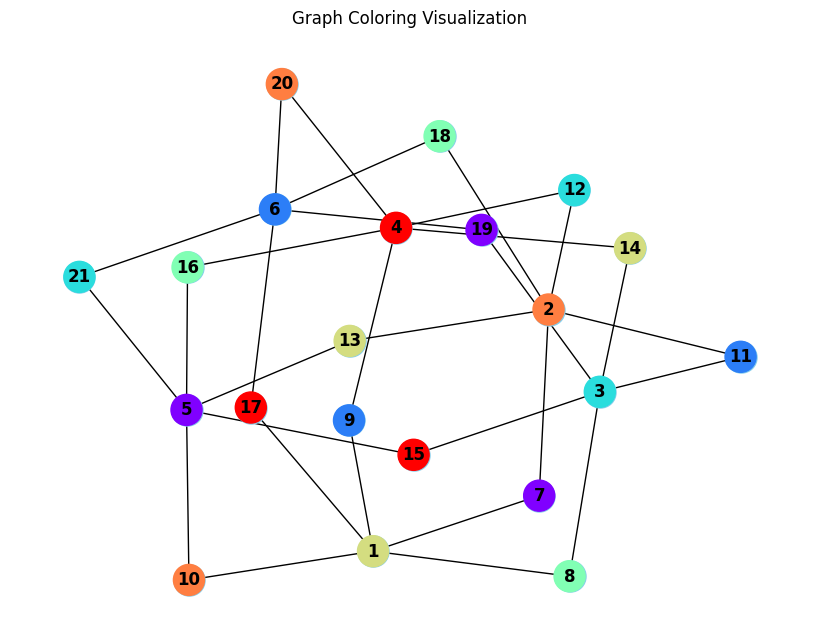

In [29]:
import random
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

def transform_graph(n, edges):
    """
    Transform the graph by adding a new vertex between each edge.
    """
    new_edges = []
    current_vertex = n + 1
    for u, v in edges:
        # Add a new vertex w between u and v
        w = current_vertex
        current_vertex += 1
        new_edges.append((u, w))
        new_edges.append((v, w))
    return current_vertex - 1, new_edges

def greedy_coloring_randomized(n, edges, iterations=100):
    """
    Greedy graph coloring with vertices traversed in random order, repeated multiple times.
    """
    def color_graph_random_order():
        color = [-1] * (n + 1)  # Colors for vertices
        vertices = list(range(1, n + 1))
        random.shuffle(vertices)

        for vertex in vertices:
            # Find used colors among adjacent and second-degree adjacent vertices
            adjacent_colors = set()
            for neighbor in adjacency_list[vertex]:  # First-degree neighbors
                if color[neighbor] != -1:
                    adjacent_colors.add(color[neighbor])
                # Check second-degree neighbors
                for second_neighbor in adjacency_list[neighbor]:
                    if color[second_neighbor] != -1:
                        adjacent_colors.add(color[second_neighbor])

            # Assign the smallest available color
            for c in range(1, n + 1):
                if c not in adjacent_colors:
                    color[vertex] = c
                    break

        return color[1:]

    # Create adjacency list
    adjacency_list = {i: [] for i in range(1, n + 1)}
    for u, v in edges:
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)

    # Generate colorings
    colorings = [color_graph_random_order() for _ in range(iterations)]
    return colorings

def lox_crossover(parent1, parent2):
    """
    Perform LOX crossover on two parents.
    """
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    child = [-1] * n
    child[start:end + 1] = parent1[start:end + 1]

    pos = end + 1
    for gene in parent2:
        if gene not in child:
            if pos >= n:
                pos = 0
            child[pos] = gene
            pos += 1

    return child

def fitness(coloring, edges, adjacency_list):
    """
    Fitness function to evaluate the coloring.
    """
    # Check for validity: no two adjacent vertices or second-degree neighbors have the same color

    # if(debug):

    for u, v in edges:

        if coloring[u - 1] == coloring[v - 1]:
            return float('-inf')  # Invalid coloring
        
        # Check second-degree neighbors: Ensure adjacent of adjacent are not the same color
        for neighbor_u in adjacency_list[u]:
            if neighbor_u != v and coloring[neighbor_u - 1] == coloring[v - 1]:
                return float('-inf')  # Invalid coloring due to second-degree neighbors
        for neighbor_v in adjacency_list[v]:
            if neighbor_v != u and coloring[neighbor_v - 1] == coloring[u - 1]:
                return float('-inf')  # Invalid coloring due to second-degree neighbors

    # else:

    #     for u, v in edges:
    #         if coloring[u - 1] == coloring[v - 1]:
    #             return float('-inf')  # Invalid coloring

    #         # Check second-degree neighbors: Ensure adjacent of adjacent are not the same color
    #         for neighbor_u in adjacency_list[u]:
    #             for neighbor_v in adjacency_list[v]:
    #                 if neighbor_u != neighbor_v and coloring[neighbor_u - 1] == coloring[neighbor_v - 1]:
    #                     return float('-inf')  # Invalid coloring due to second-degree neighbors

    # Return the inverse of the number of colors (lower is better)
    return 1 / len(set(coloring))

def genetic_algorithm_on_transformed_graph(n, edges, population_size=1000, generations=200, mutation_rate=0.1):
    """
    Solve the graph coloring problem on the transformed graph using a Genetic Algorithm.
    """
    # Transform the graph
    transformed_n, transformed_edges = transform_graph(n, edges)

    # Create adjacency list for the transformed graph
    adjacency_list = {i: [] for i in range(1, transformed_n + 1)}
    for u, v in transformed_edges:
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)

    # Generate initial population using randomized greedy coloring
    initial_population = greedy_coloring_randomized(transformed_n, transformed_edges, iterations=population_size)
    population = initial_population

    # Track the global best
    global_best_coloring = None
    global_min_colors = float('inf')

    for generation in range(generations):
        # Calculate fitness for each individual
        fitness_scores = [fitness(coloring, transformed_edges, adjacency_list) for coloring in population]

        print("fitness scores",fitness_scores)

        # Select valid individuals
        valid_population = [(coloring, score) for coloring, score in zip(population, fitness_scores) if score > float('-inf')]
        if not valid_population:
            raise ValueError("No valid solutions in the population!")

        # Sort by fitness (higher is better)
        valid_population.sort(key=lambda x: x[1], reverse=True)

        # Check if the best coloring is valid (revalidate before considering as best)
        best_coloring, best_fitness = valid_population[0]
        if fitness(best_coloring, transformed_edges, adjacency_list) > float('-inf'):

            # val = fitness(best_coloring, transformed_edges, adjacency_list)

            # if val == 2:

            min_colors = len(set(best_coloring))
            if min_colors < global_min_colors:
                global_best_coloring = best_coloring
                global_min_colors = min_colors

        # Selection: Keep top individuals
        selected_parents = [coloring for coloring, _ in valid_population[:population_size // 2]]

        # Crossover
        offspring = []
        for parent1, parent2 in combinations(selected_parents, 2):
            offspring.append(lox_crossover(parent1, parent2))
            offspring.append(lox_crossover(parent2, parent1))
            if len(offspring) >= population_size:
                break

        # Mutation
        for child in offspring:
            if random.random() < mutation_rate:
                mutate_index = random.randint(0, transformed_n - 1)
                # Reassign a random color
                child[mutate_index] = random.randint(1, transformed_n)

        # Replace population
        population = offspring

        # Print progress
        print(f"Generation {generation + 1}: Best fitness = {best_fitness:.4f}, Colors used = {min_colors}")

    # Return the global best solution
    return global_best_coloring, global_min_colors

def plot_graph(vertices, edges, coloring=None):
    """
    Plot the graph using NetworkX, optionally showing the coloring.
    """
    G = nx.Graph()
    G.add_nodes_from(vertices)
    G.add_edges_from(edges)
    
    pos = nx.spring_layout(G)  # Positions for all nodes
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold')
    
    if coloring:
        node_colors = [coloring[v - 1] for v in vertices]  # Color nodes based on the coloring
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    
    plt.title("Graph Coloring Visualization")
    plt.show()

# Example usage
# original_vertices = 5
# original_edges = [(1, 2), (2, 3), (3, 4), (4, 5)]



# original_vertices = 8
# original_edges = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 8), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]

original_vertices = 6
original_edges = [(1, 2), (1, 3), (1, 4),(1,5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5) , (1,6) ,(2,6),(3,6),(4,6),(5,6)]

best_coloring, min_colors = genetic_algorithm_on_transformed_graph(original_vertices, original_edges,10000,100)

print("\nBest coloring found:", best_coloring)
print("Minimum number of colors used:", min_colors)

# Plot the transformed graph and best coloring
transformed_n, transformed_edges = transform_graph(original_vertices, original_edges)
plot_graph(list(range(1, transformed_n + 1)), transformed_edges, coloring=best_coloring)
